In [1]:
# Utils analysis
from utils_analysis import *

# Standard
import torch
import numpy as np
import pandas as pd
import os
import sys; sys.path.append("../")

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Globals
VAL_BATCHES = 10

Not deleting all pareto related files, if you want to recompute, run: update(recompute=True)
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs_run_overview.csv
pareto epoch not in full_par_dict for run: 2021-06-02-YELP | DECODER-ONLY-run-13:01:04
pareto epoch not in full_par_dict for run: 2021-06-02-PTB | DECODER-ONLY-run-13:01:37
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
--------------------------------------------------
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation, in /home/cbarkhof

# Big experiment

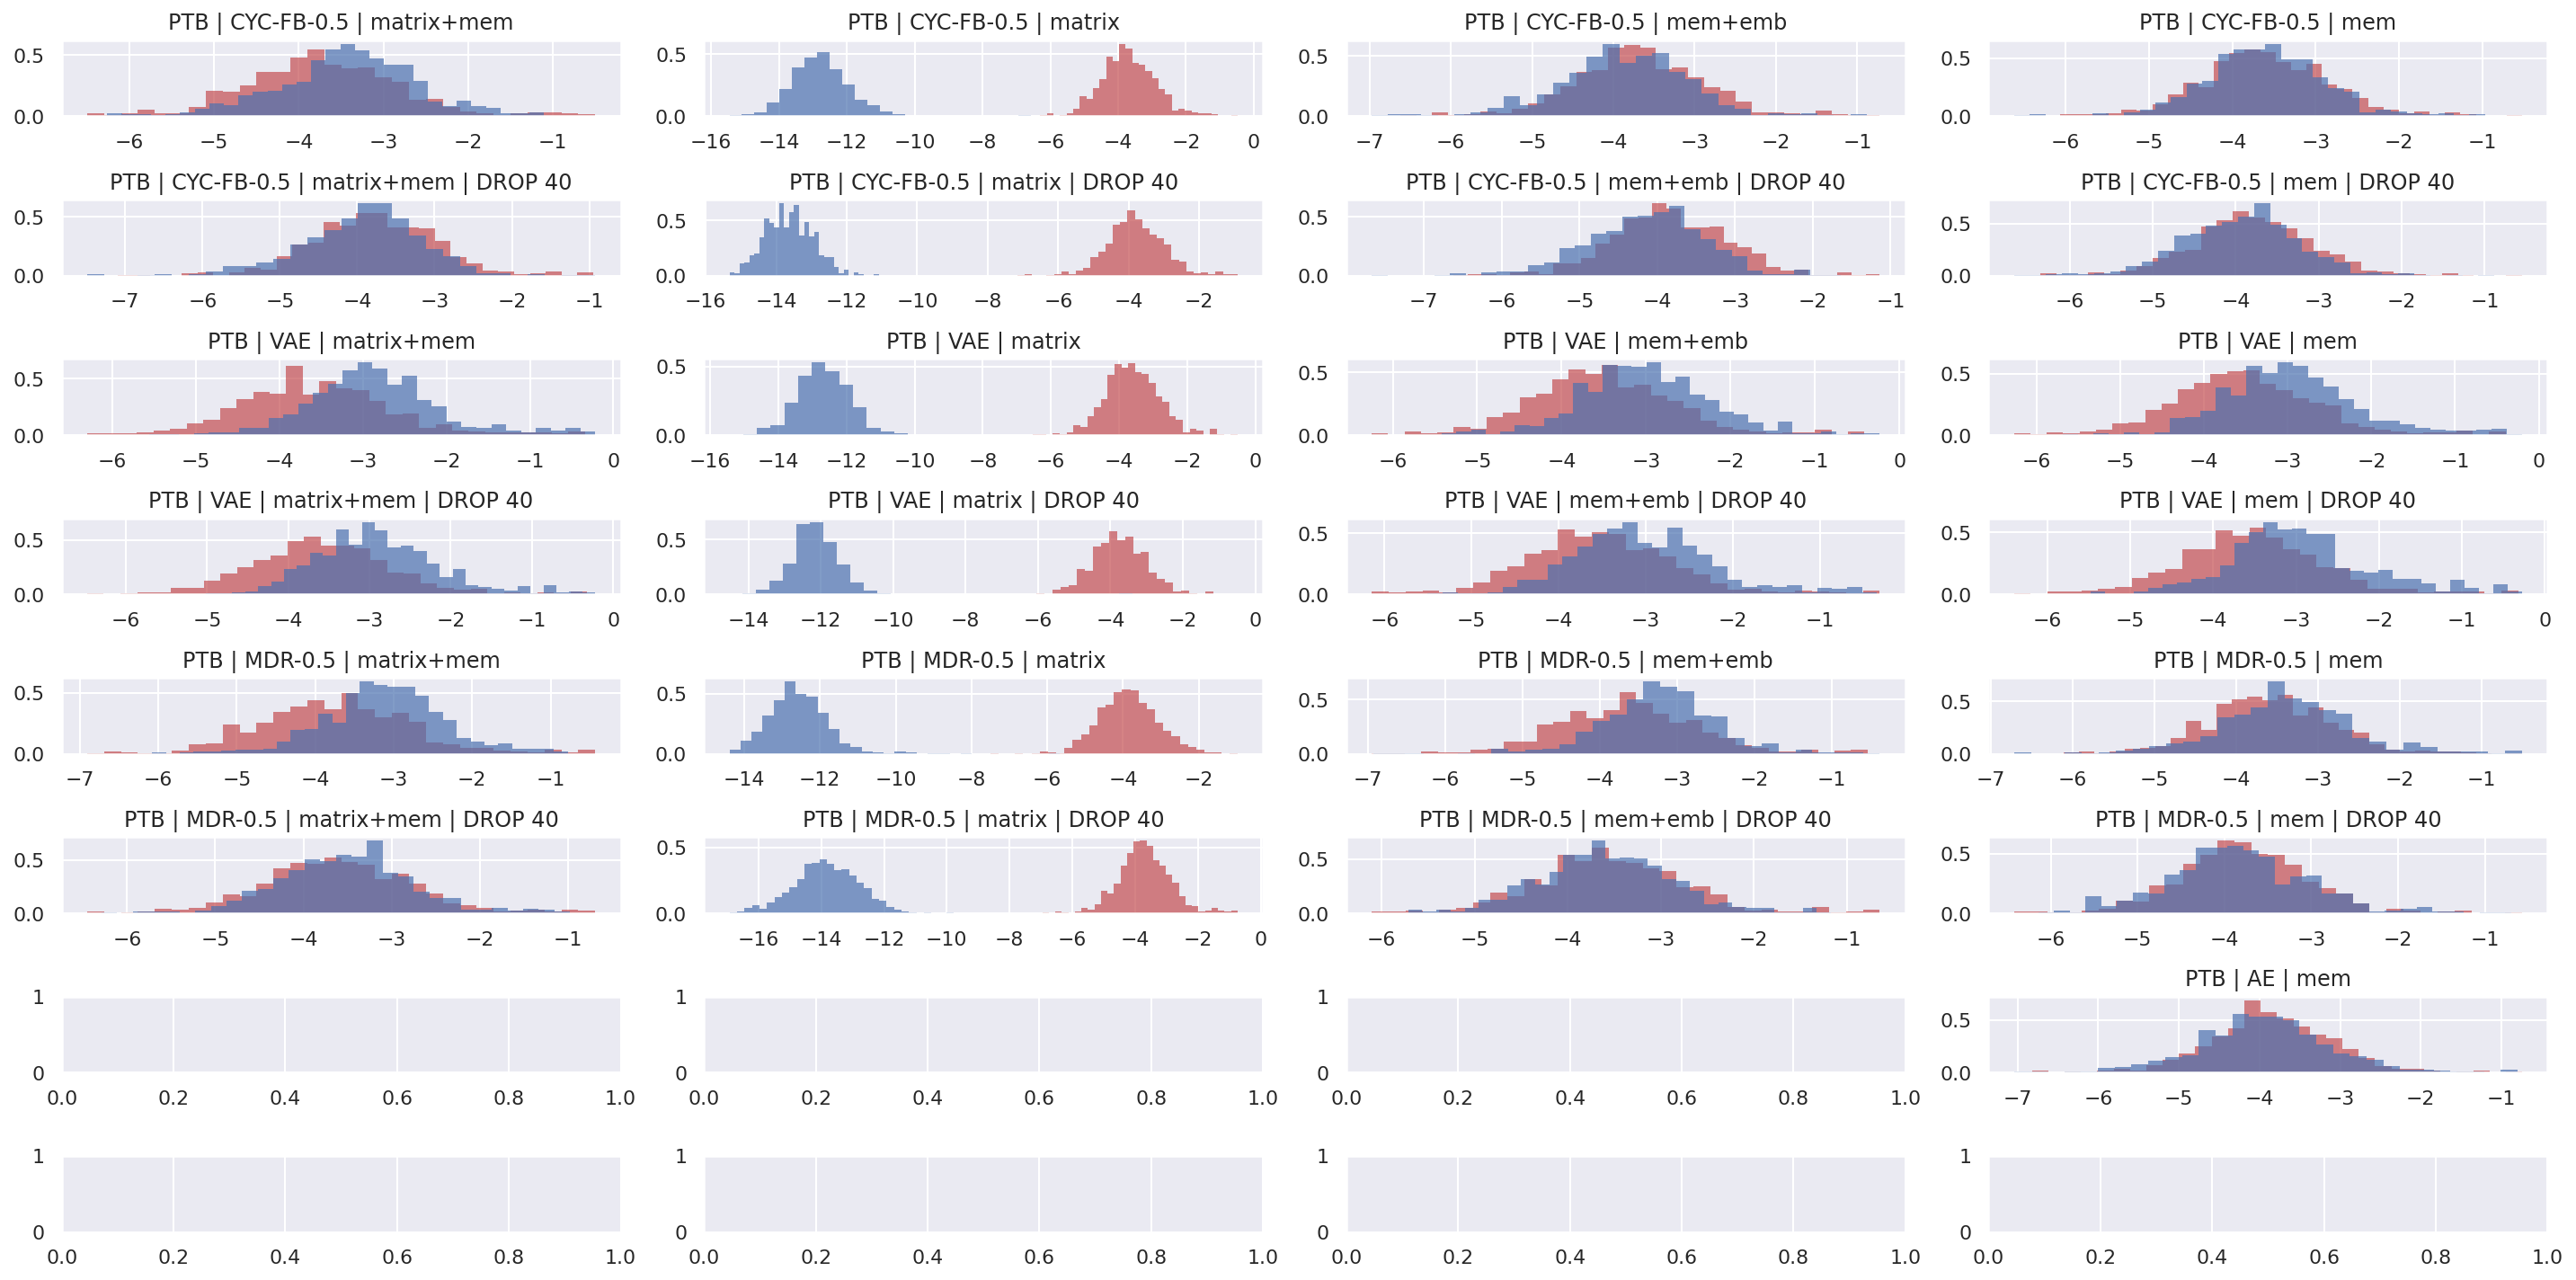

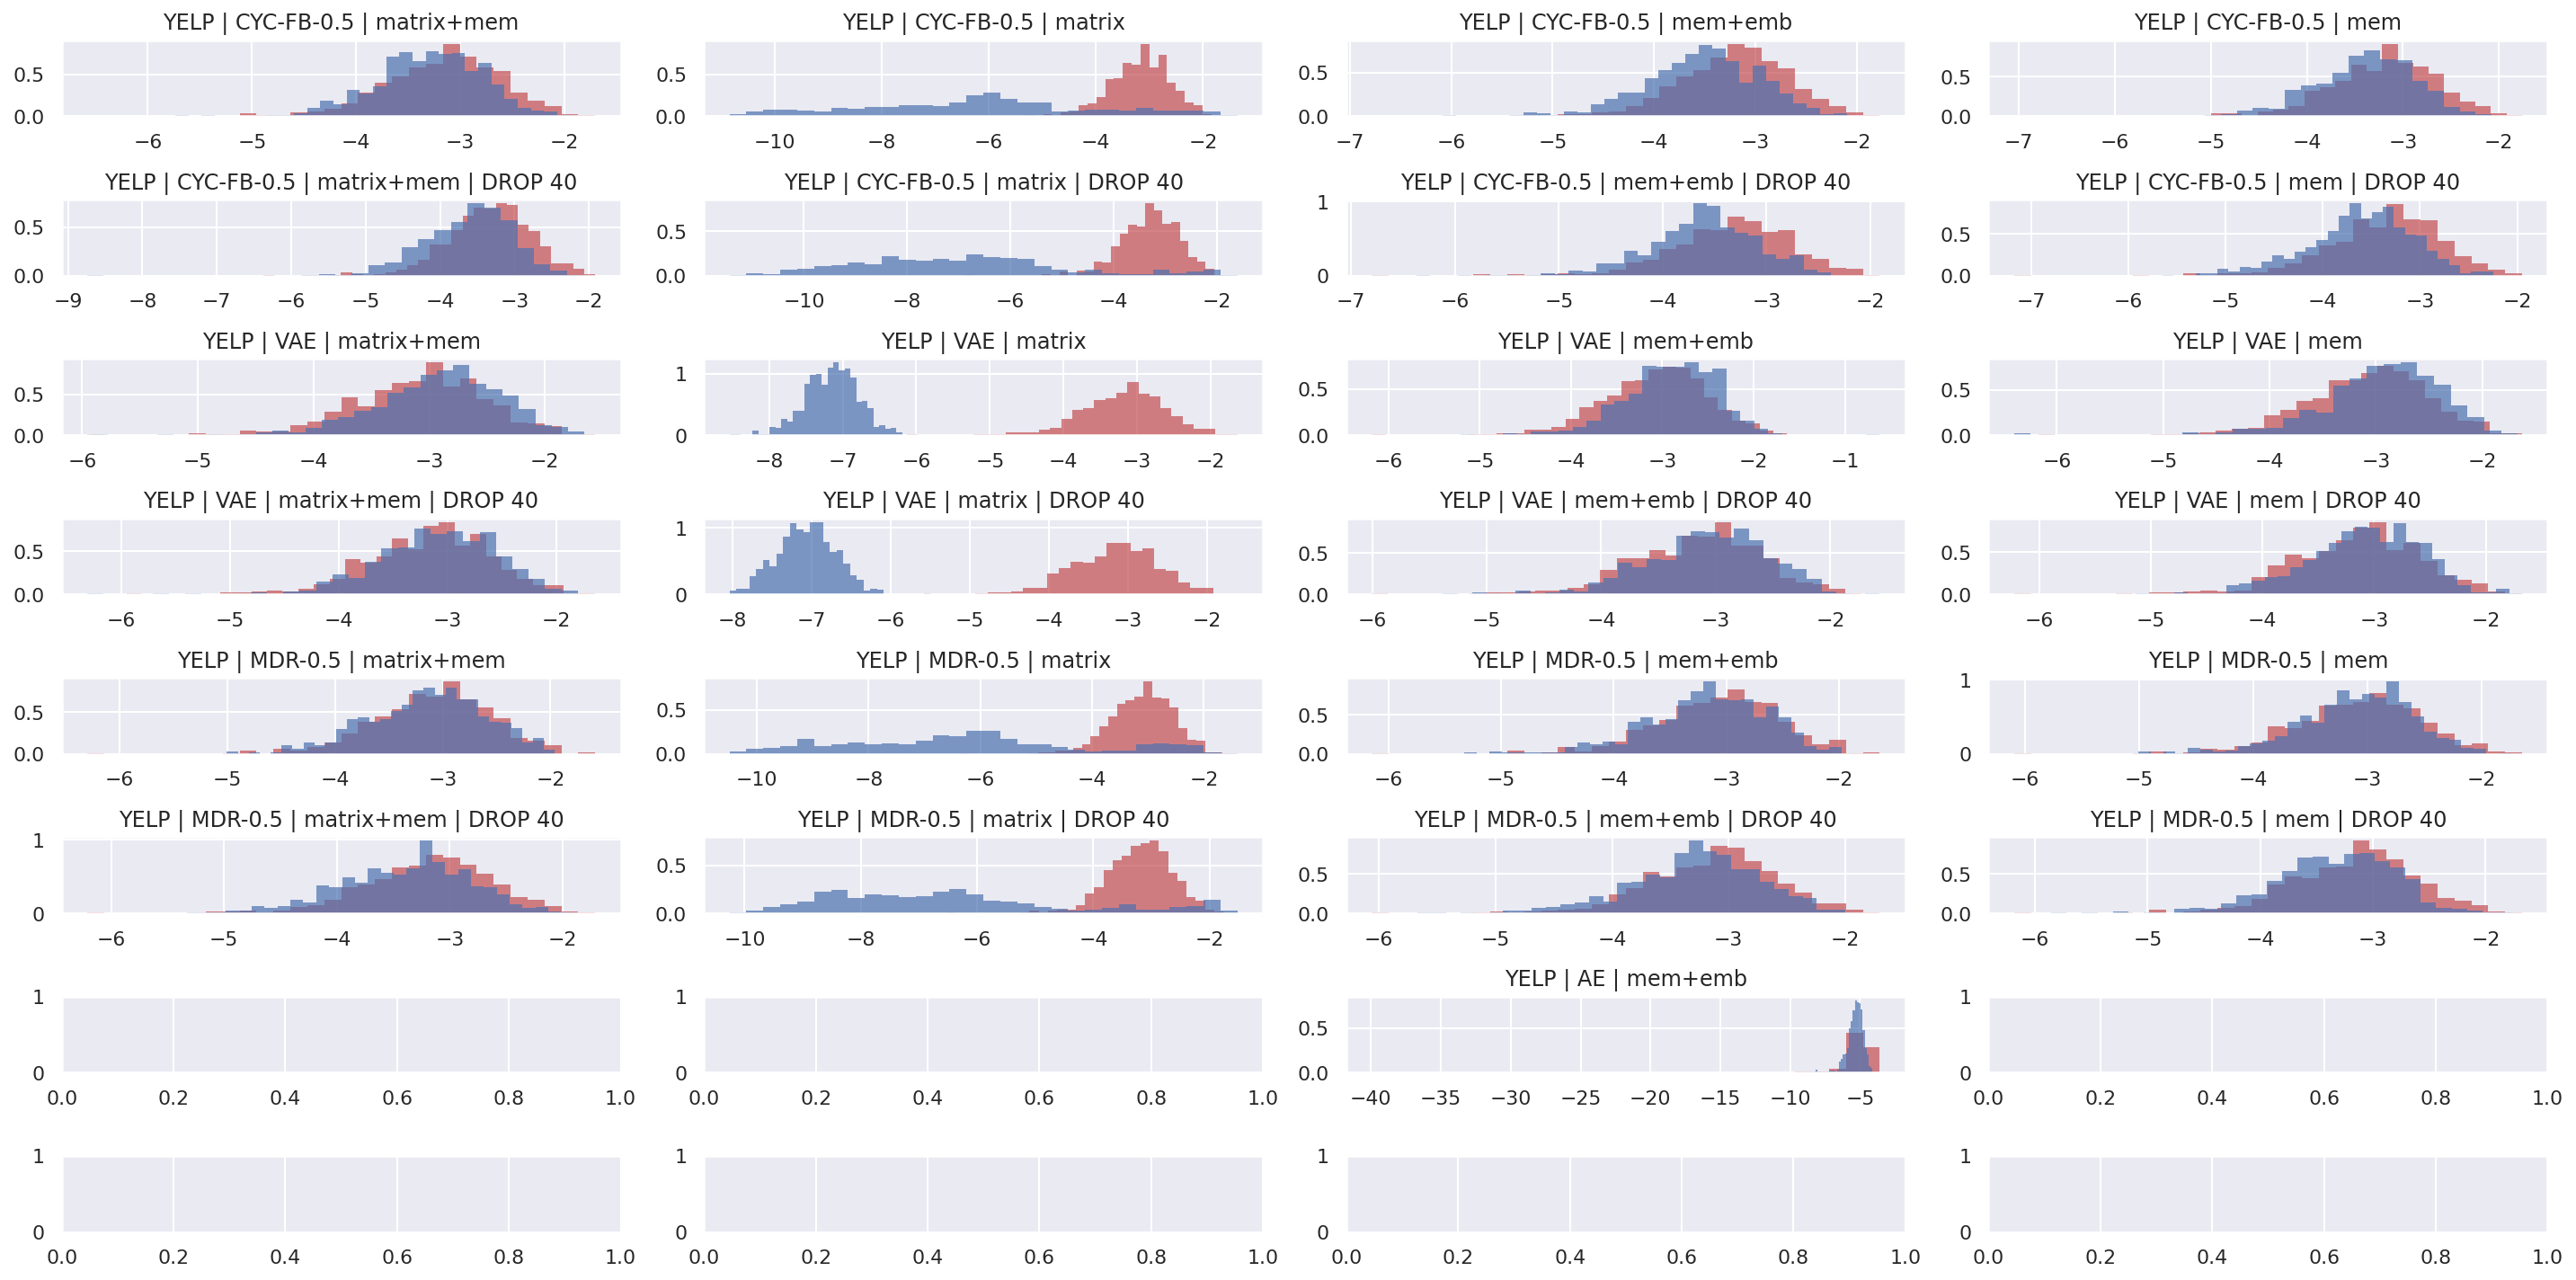

In [5]:
exp_name = "Runs"
df = read_overview_csv(exp_name=exp_name)

for dataset in ["PTB", "YELP"]:
    fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(20, 10))
    
    del_axs = []
    
    for outer_row_i, opt in enumerate(["CYC-FB-0.5", "VAE", "MDR-0.5", "AE"]):
        for inner_row_i, drop in enumerate([0.0, 0.4]):
            for col_i, mech in enumerate(["matrix+mem", "matrix", "mem+emb", "mem"]):
                
                row_i = outer_row_i * 2 + inner_row_i
                #print(row_i, col_i, dataset, opt, drop, mech)
                
                select_df = df[(df["mech_string"] == mech) & \
                              (df["drop"] == drop) & \
                              (df["optimisation"] == opt) & \
                              (df["dataset"] == dataset)]
                
                if len(select_df) > 0:
                    run_name = select_df["run_name"].values[0]
                    clean_name = select_df["clean_name"].values[0]
                    try:
                        s = get_sum_stats_run(run_name, exp_name=exp_name, val_batches=VAL_BATCHES)
                        axs[row_i, col_i].hist(s["iw_ll_p_w"].numpy(), density=True, bins=30, color='r',linewidth=0.0,  alpha=0.7)
                        axs[row_i, col_i].hist(s["iw_ll_x_gen_p_w"].numpy(), density=True, bins=30, color='b',linewidth=0.0,  alpha=0.7)
                        axs[row_i, col_i].set_title(clean_name)
                    except:
                        del_axs.append([row_i, col_i])
                else:
                    del_axs.append([row_i, col_i])
                
    plt.tight_layout()
    plt.show()            

# Target rate experiment

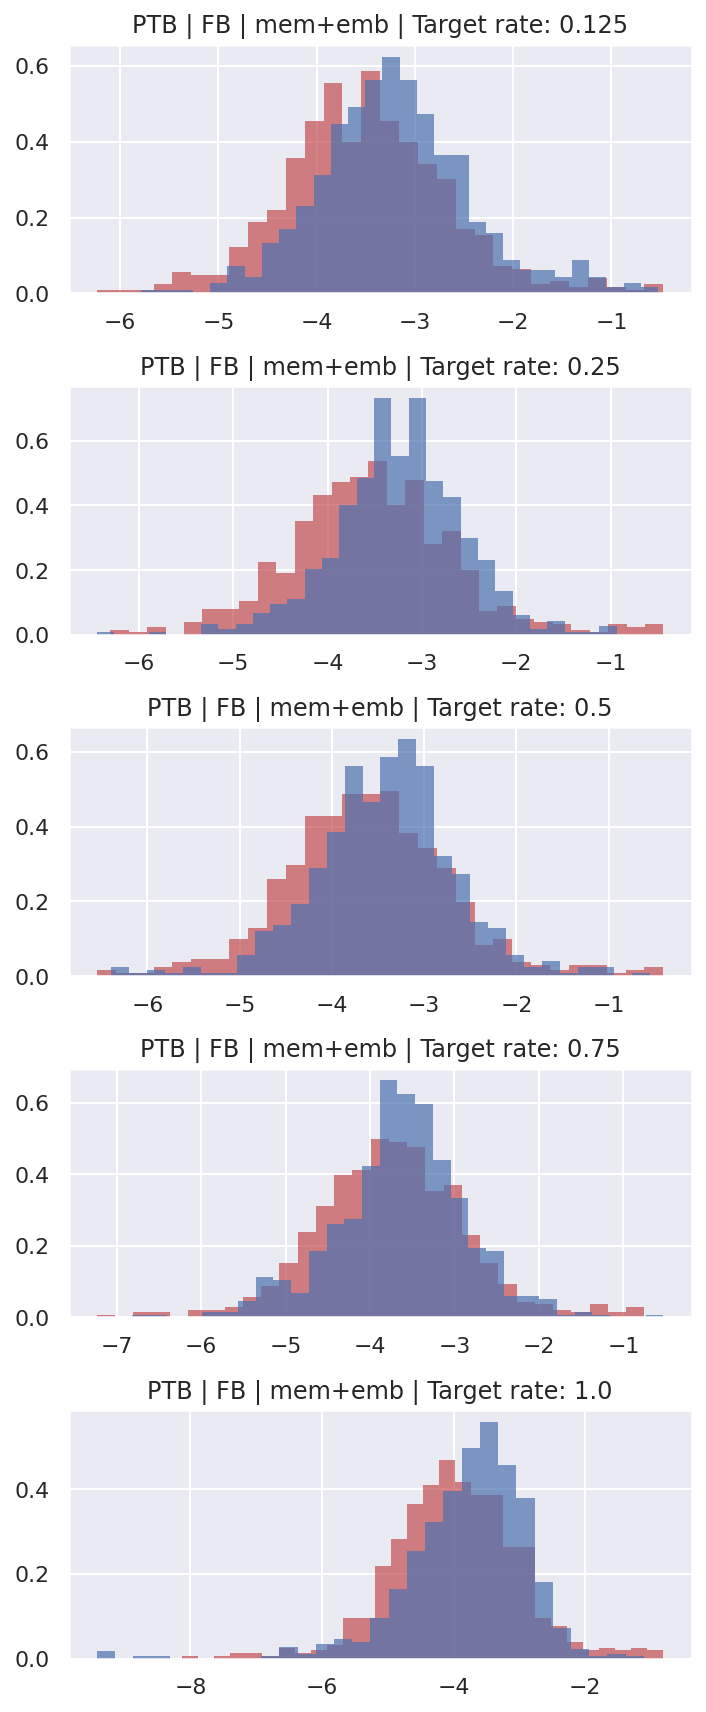

In [6]:
exp_name = "Runs-target-rate"
df = read_overview_csv(exp_name=exp_name)

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 12))

del_axs = []

for col_i, tr in enumerate([0.125, 0.25, 0.5, 0.75, 1.0]):

    select_df = df[(df["target_rate"] == tr)]
    
    if len(select_df) > 0:
        run_name = select_df["run_name"].values[0]
        clean_name = select_df["clean_name"].values[0]
        try:
            s = get_sum_stats_run(run_name, exp_name=exp_name, val_batches=VAL_BATCHES)
            axs[col_i].hist(s["iw_ll_p_w"].numpy(), density=True, bins=30, color='r', linewidth=0.0, alpha=0.7)
            axs[col_i].hist(s["iw_ll_x_gen_p_w"].numpy(), density=True, bins=30, color='b', linewidth=0.0, alpha=0.7)
            axs[col_i].set_title(clean_name)
        except:
            del_axs.append(col_i)
    else:
        del_axs.append(col_i)

plt.tight_layout()
plt.show()            

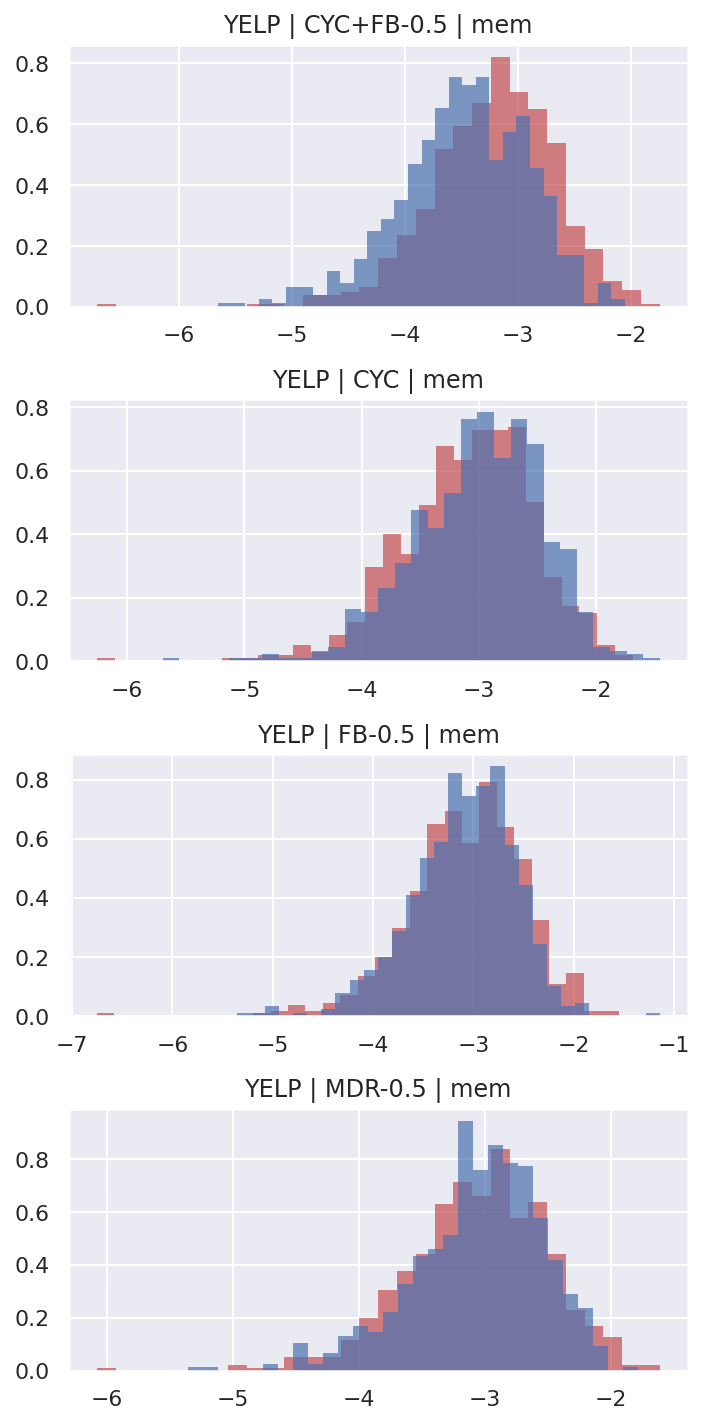

In [7]:
exp_name = "Runs-ablation"
df = read_overview_csv(exp_name=exp_name)

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))

del_axs = []

for col_i, opt in enumerate(["CYC+FB-0.5", "CYC", "FB-0.5", "MDR-0.5"]):

    select_df = df[(df["optimisation"] == opt)]
    
    if len(select_df) > 0:
        run_name = select_df["run_name"].values[0]
        clean_name = select_df["clean_name"].values[0]
        try:
            s = get_sum_stats_run(run_name, exp_name=exp_name, val_batches=VAL_BATCHES)
            axs[col_i].hist(s["iw_ll_p_w"].numpy(), density=True, bins=30, color='r', linewidth=0.0,  alpha=0.7)
            axs[col_i].hist(s["iw_ll_x_gen_p_w"].numpy(), density=True, bins=30, color='b', linewidth=0.0, alpha=0.7)
            axs[col_i].set_title(clean_name)
        except:
            del_axs.append(col_i)
    else:
        del_axs.append(col_i)

plt.tight_layout()
plt.show()            